Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


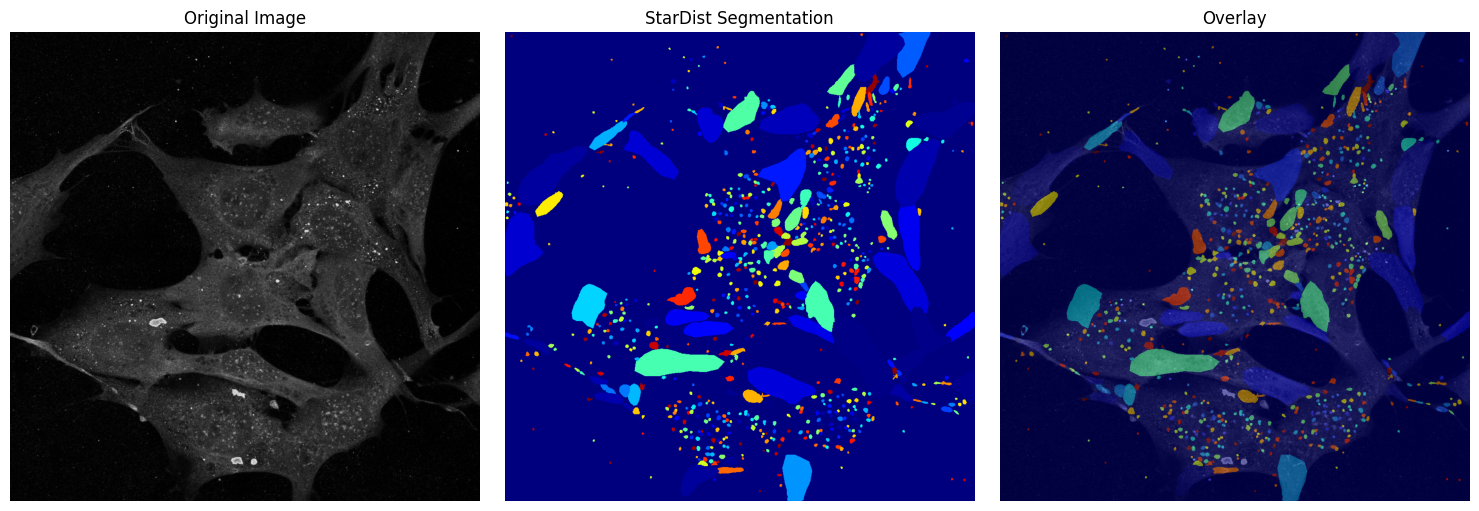

In [1]:
from stardist.models import StarDist2D
from csbdeep.utils import normalize
import tifffile
import matplotlib.pyplot as plt

# Load your 2D .tif image
image_path = "4_img.tif" 
img = tifffile.imread(image_path)

# Normalize the image (important for StarDist)
img_norm = normalize(img, 1, 99.8, axis=None)

# Load a pre-trained StarDist 2D model
model = StarDist2D.from_pretrained('2D_versatile_fluo')

labels, details = model.predict_instances(
    img_norm,
    prob_thresh=0.1,
    nms_thresh=0.1,
    n_tiles=(1,1)
)

# Visualize results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(labels, cmap='jet')
axes[1].set_title('StarDist Segmentation')
axes[2].imshow(img, cmap='gray')
axes[2].imshow(labels, cmap='jet', alpha=0.5)
axes[2].set_title('Overlay')
for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()

predicting instances with nms_thresh = 0.5
non-maximum suppression...
Non Maximum Suppression (2D) ++++ 
NMS: n_polys    = 3182 
NMS: n_rays     = 32  
NMS: thresh     = 0.500 
NMS: use_bbox   = 1
NMS: use_kdtree = 1
NMS: using OpenMP with 24 thread(s)
NMS: building kdtree...
NMS: starting suppression loop
|###############################################   | [94 % suppressed]
NMS: Suppressed polygons:       3016 / 3182  (94.78 %)
keeping 166/3182 polyhedra
NMS took 0.0622 s


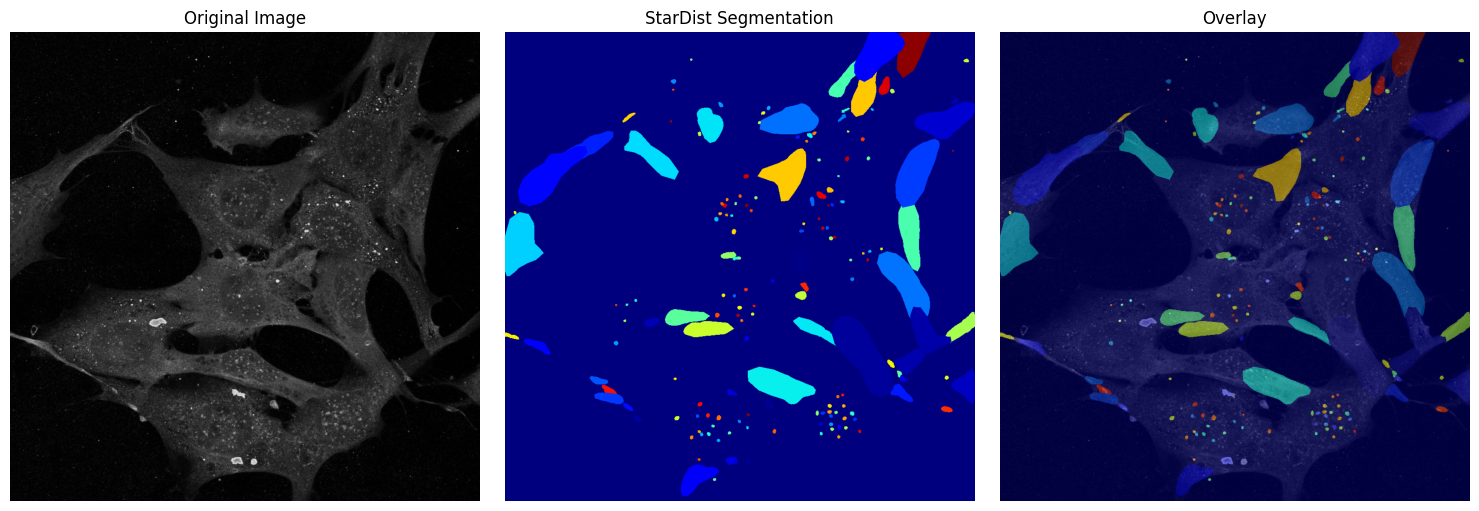

In [2]:
labels, details = model.predict_instances(
    img_norm,
    prob_thresh=0.5,
    nms_thresh=0.5,
    n_tiles=(1,1),
    verbose=True,
)

# Visualize results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(labels, cmap='jet')
axes[1].set_title('StarDist Segmentation')
axes[2].imshow(img, cmap='gray')
axes[2].imshow(labels, cmap='jet', alpha=0.5)
axes[2].set_title('Overlay')
for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()